Q1. loading the dataset and displaying rows and columns

In [19]:
import pandas as pd
import numpy as np


In [20]:
df = pd.read_csv("cwurData.csv")
df.shape

(2200, 14)

Q2. Displaying the top 5 and last 10 rows

In [6]:
print(df.head()) #first 5 rows

   world_rank                            institution  ...   score  year
0           1                     Harvard University  ...  100.00  2012
1           2  Massachusetts Institute of Technology  ...   91.67  2012
2           3                    Stanford University  ...   89.50  2012
3           4                University of Cambridge  ...   86.17  2012
4           5     California Institute of Technology  ...   85.21  2012

[5 rows x 14 columns]


In [13]:
df.iloc[-10:] #Displaying last 10 rows

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
2190,991,Xidian University,China,81,367,542,218,830,974,812,984.0,434,44.03,2015
2191,992,Federal University of Bahia,Brazil,17,367,540,218,962,865,645,969.0,774,44.03,2015
2192,993,Southwest Jiaotong University,China,82,367,327,218,937,962,812,998.0,861,44.03,2015
2193,994,Ryerson University,Canada,33,367,567,218,811,969,511,975.0,756,44.03,2015
2194,995,King Abdulaziz University,Saudi Arabia,4,367,449,218,595,430,645,994.0,839,44.03,2015
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015
2199,1000,China Pharmaceutical University,China,83,367,567,218,861,991,812,981.0,547,44.02,2015


Q3. Listing the data types of all attributes

In [14]:
print(df.dtypes)

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object


Q4. Displaying max and min 

In [34]:
df.describe(include=[np.number]) #How to get only max and min here
df.agg(['min','max'])

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
min,1,AGH University of Science and Technology,Argentina,1,1,1,1,1,1,1,1.0,1,43.36,2012
max,1000,Örebro University,Uruguay,229,367,567,218,1000,991,812,1000.0,871,100.00,2015


Q5. Python code to find count of missing values

In [26]:
null_value = df.isnull().sum() #For each attribute
print(null_value)


world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64


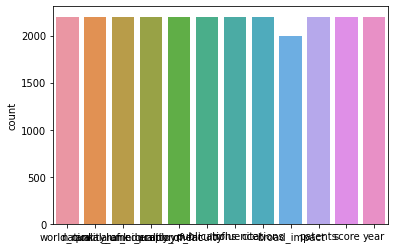

In [107]:
import seaborn as sns
sns.countplot(data=df)

Q7. Calculate mean, mode and median for all numerical attributes

In [33]:
#How to get the agg on only numerical attributes
df.agg(
  ['mean','std','median']
)

,world_rank,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
mean,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
median,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000


Q8. Correlation between different attributes using heatmap


Text(0.5, 1.0, 'Correlation Heatmap')

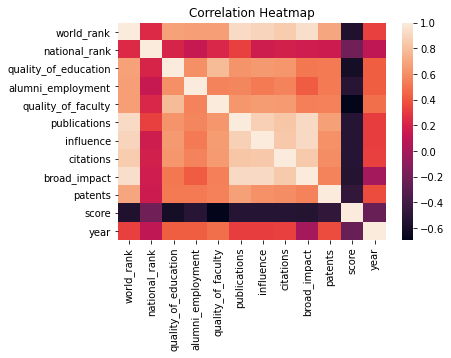

In [38]:
import matplotlib.pyplot as plt
heatmap = sns.heatmap(df.corr())

heatmap.set_title('Correlation Heatmap') #Giving a title to the heatmap

Q9. Sorting the top 10 institutes based on world ranking

In [64]:
df1 = df.loc[df["year"]==2015] #Filtering based on year
df2 = df1[['world_rank','institution']] #Displaying only 2 columns
df2.nsmallest(10,'world_rank') #sorting the top 10 institutes
#df.columns


,world_rank,institution
1200,1,Harvard University
1201,2,Stanford University
1202,3,Massachusetts Institute of Technology
1203,4,University of Cambridge
1204,5,University of Oxford
1205,6,Columbia University
1206,7,"University of California, Berkeley"
1207,8,University of Chicago
1208,9,Princeton University
1209,10,Cornell University


Q10. Sorting the institutes based on Quality of Education (Top 10)

In [68]:
df_qua1 = df.loc[df["year"]==2014]
df_qua2 = df_qua1[["quality_of_education","institution"]]
df_qua2.nsmallest(10,"quality_of_education")

,quality_of_education,institution
200,1,Harvard University
203,2,University of Cambridge
202,3,Massachusetts Institute of Technology
206,4,"University of California, Berkeley"
208,5,Princeton University
211,6,California Institute of Technology
204,7,University of Oxford
234,8,École normale supérieure - Paris
209,9,Yale University
207,10,University of Chicago


Q11. Top 10 institutes whose score in 2012 are greater than 70

In [82]:
df_score = df.loc[df["score"]>70]
df_score1 = df_score.loc[df["year"]==2012]
df_score2 = df_score1[["score","institution"]]
df_scorefinal = df_score2.nlargest(10,"score") #to sort in descending order
print(df_scorefinal)

    score                            institution
0  100.00                     Harvard University
1   91.67  Massachusetts Institute of Technology
2   89.50                    Stanford University
3   86.17                University of Cambridge
4   85.21     California Institute of Technology
5   82.50                   Princeton University
6   82.34                   University of Oxford
7   79.14                        Yale University
8   78.86                    Columbia University
9   78.55     University of California, Berkeley


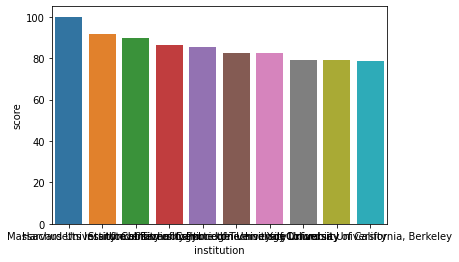

In [83]:
bp = sns.barplot(x="institution",y="score",data = df_scorefinal)

Q13. Histogram - national_rank, quality of education, alumni employment, quality of faculty, publications

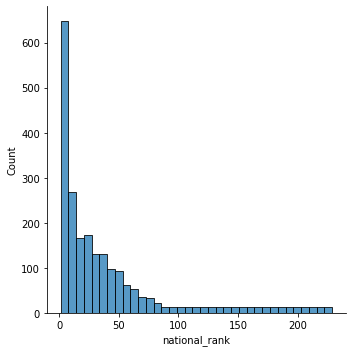

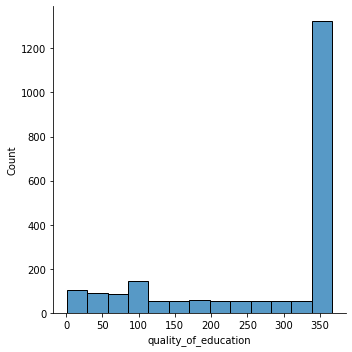

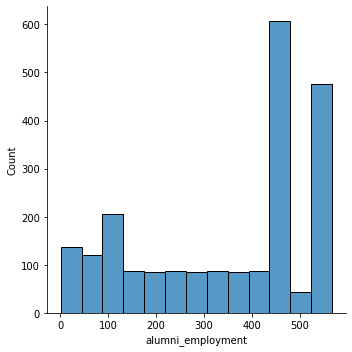

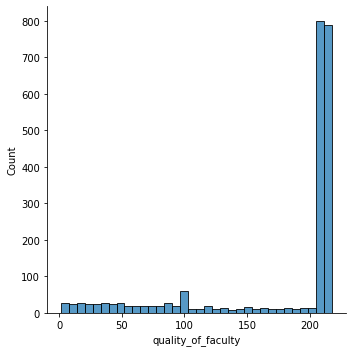

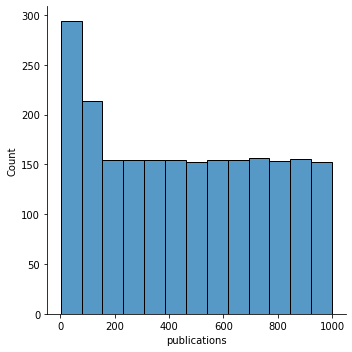

In [86]:
sns.displot(df,x="national_rank")
sns.displot(df,x="quality_of_education")
sns.displot(df,x="alumni_employment")
sns.displot(df,x="quality_of_faculty")
sns.displot(df,x="publications")

Q14. Line Plot between Score and publications

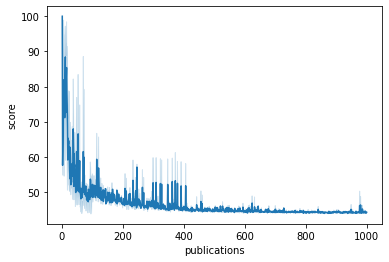

In [88]:
sns.lineplot(data=df,x="publications",y="score")

Q15. Display Institute and world ranking where alumni employment <= 5 in the year 2014

In [89]:
df_alum_emp = df.loc[df["alumni_employment"]<=5]
df_alum_emp1 = df_alum_emp.loc[df["year"]==2014]
df_alum_emp2 = df_alum_emp1[["institution","world_rank"]]
print(df_alum_emp2)

                    institution  world_rank
200          Harvard University           1
201         Stanford University           2
212         University of Tokyo          13
213  University of Pennsylvania          14
233             Keio University          34


Q16. Line Plot - Publication vs citation

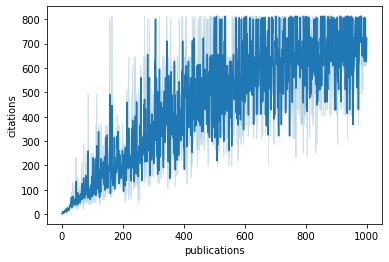

In [90]:
sns.lineplot(data=df,x="publications",y="citations")

Q17. Display World ranks and institutes where world rank is between 30 and 40 in the year 2013

In [98]:
df_world_rank = df.loc[df["world_rank"]>=30 and df["world_rank"]<=40 ]
df_world_rank1 = df_world_rank.loc[df["year"]==2013]
df_world_rank2 = df_world_rank1[["world_rank","institution"]]
print(df_world_rank2)

ValueError: ignored

ValueError: ignored

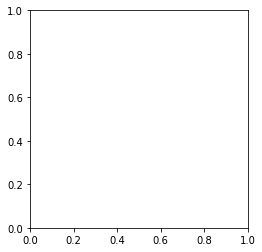

In [109]:
df_country = df.loc[df["year"]==2013]
df_country1 = df_country[["country"]]
plt.pie(df_country1)
plt.show()


Q19. Scatter plot between world rank and national rank attributes for the year 2012

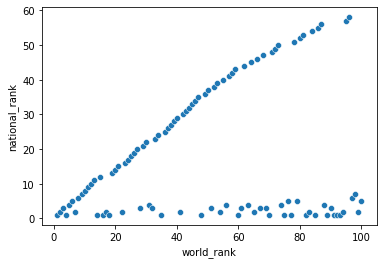

In [105]:
df_yr = df.loc[df["year"]==2012]
sns.scatterplot(data=df_yr,x="world_rank",y="national_rank")